In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import os
import sys
import re
import json
from pathlib import Path

from datetime import datetime, timedelta

from IPython.display import display, HTML

from matplotlib2tikz import save as tikz_save

%matplotlib inline
%load_ext autoreload


%autoreload 2

In [2]:
[x for x in Path(r"C:\Users\alfoc.ULAVAL\Desktop").iterdir() if re.match("\d+.TXT", str(x.name))]

[WindowsPath('C:/Users/alfoc.ULAVAL/Desktop/20190403.TXT'),
 WindowsPath('C:/Users/alfoc.ULAVAL/Desktop/20190404.TXT'),
 WindowsPath('C:/Users/alfoc.ULAVAL/Desktop/20190405.TXT')]

In [3]:
df = []
for file in [x for x in Path(r"C:\Users\alfoc.ULAVAL\Desktop").iterdir() if re.match("\d+.TXT", str(x.name))][-1:]:
    df.append(pd.read_csv(file, skipinitialspace=True))
df = pd.concat(df)
df = df.apply(lambda x : pd.to_numeric(x, errors='coerce'), axis=1).dropna()

df.index = pd.to_datetime(df.UnixTime.astype(int), unit='s')
df = df.drop(columns=['UnixTime'])
df

,VBat,T°C,V,B,G,Y,O,R
UnixTime,,,,,,,,
2019-04-05 15:49:20,4.07,26.0,89.46,77.70,161.01,117.46,125.81,74.17
2019-04-05 15:49:29,4.07,26.0,2270.08,7345.65,1312.96,3610.76,543.62,953.31
2019-04-05 15:49:38,4.07,26.0,4084.75,233.11,12504.98,1879.37,14579.27,445.00
2019-04-05 15:49:47,4.07,26.0,4896.82,241.15,13543.46,2711.77,15072.19,743.47
2019-04-05 15:49:57,4.07,26.0,4951.42,242.49,13583.44,2778.36,15107.87,773.32
2019-04-05 15:50:06,4.07,25.0,4944.45,242.49,13527.25,2748.77,15111.63,768.80
2019-04-05 15:50:15,4.07,25.0,4792.26,239.81,13194.42,2531.42,15029.00,704.58
2019-04-05 15:50:24,4.07,25.0,4777.16,239.81,13162.00,2509.22,15027.13,698.25
2019-04-05 15:50:33,4.07,25.0,4746.95,239.81,13098.24,2468.53,15018.68,688.30


In [6]:
(df.index[-1] - df.index[0]) * 4

Timedelta('6 days 18:15:20')

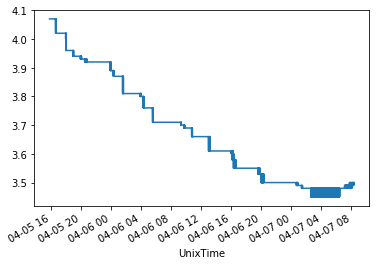

In [9]:
df.VBat.plot()

In [4]:
value_col = ['V', 'B', 'G', 'Y', 'O', 'R']
colors = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']

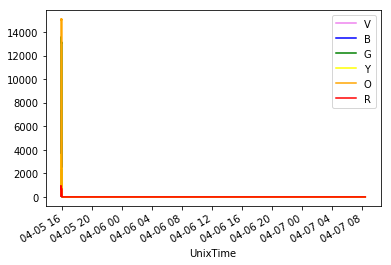

In [5]:
df[value_col].plot(color=colors)

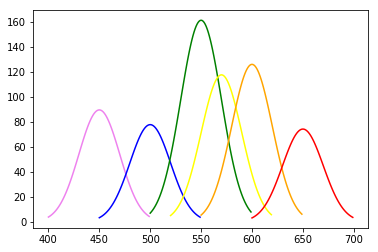

In [6]:
def plot_spectre(values):
    for val, wl, color in zip(values, [450, 500, 550, 570, 600, 650], colors):
        gauss = scipy.stats.norm(loc=wl, scale=20).pdf(np.arange(wl-50, wl+50))/(1/(20 * np.sqrt(2*np.pi)))
        im = plt.plot(np.arange(wl-50, wl+50),
                 gauss*val,
                color=color)
    return im
plot_spectre(df[value_col].iloc[0])
plt.show()